# Decision Tree

# Classification

## Training a Decision Tree

In [3]:
from sklearn import tree

In [4]:
X = [[0,0], [1,2]]
y = [0,1]

In [5]:
clf = tree.DecisionTreeClassifier()

In [6]:
clf = clf.fit(X,y)

In [7]:
clf.predict([[2,2]])

array([1])

In [8]:
clf.predict_proba([[2,2]])

array([[0., 1.]])

In [9]:
clf.predict([[0.4,1.2]])

array([1])

In [10]:
clf.predict_proba([[0.4,1.2]])

array([[0., 1.]])

# Apply to Iris Dataset

In [11]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()

In [12]:
X = iris.data[:, 2:]

In [13]:
y = iris.target

In [14]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
clf = tree.DecisionTreeClassifier(random_state = 42)

In [16]:
clf = clf.fit(X,y)

In [17]:
from sklearn.tree import export_graphviz

In [18]:
export_graphviz(clf, 
                out_file = 'tree.dot', 
                feature_names = iris.feature_names[2:], 
                class_names = iris.target_names, 
                rounded = True,
                filled = True)

## Graphviz

In [19]:
import graphviz

In [20]:
dot_data = tree.export_graphviz(clf, 
                                out_file=None, 
                                feature_names = iris.feature_names[2:], 
                                class_names = iris.target_names, 
                                rounded = True,
                                filled = True)

In [21]:
graph = graphviz.Source(dot_data)

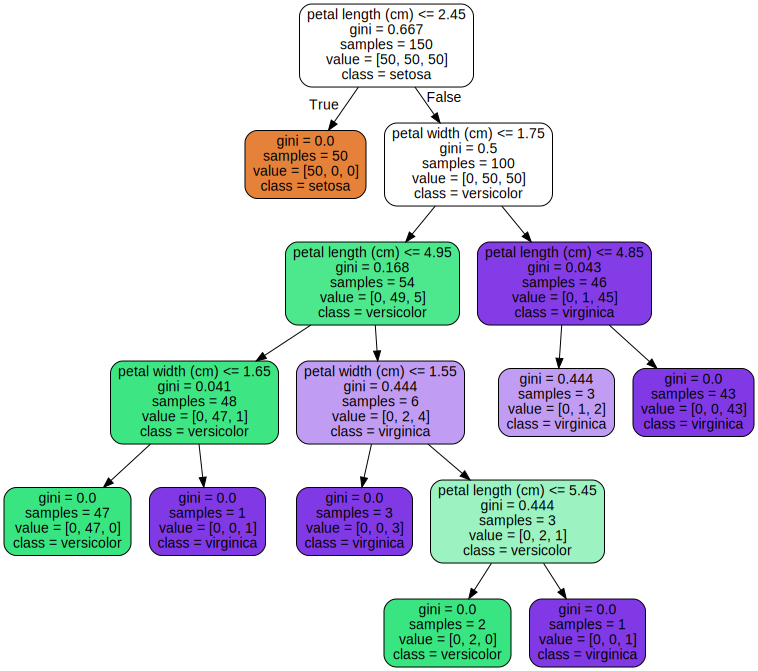

In [22]:
graph

## Visualize the Decision Boundary

In [23]:
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [25]:
col = ['petal_length', 'petal_width']
X = df.loc[:, col]

In [26]:
species_to_num = {'setosa' : 0,
                 'versicolor' : 1,
                 'virginica' : 2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']

In [27]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

In [28]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

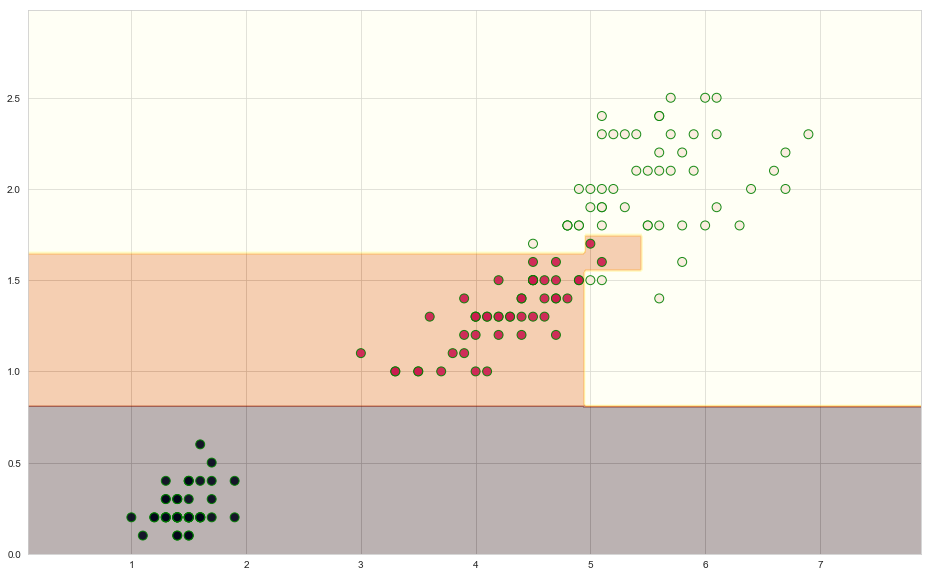

In [29]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize = (16,10))
ax = plt.contourf(xx,yy,z,cmap='afmhot',alpha=0.3)
plt.scatter(X.values[:,0], X.values[:,1], c=y, s=80, alpha = 0.9, edgecolors='g')

In [30]:
def gini(p):
    return ((p)*(1-(p)) + (1-p)*(1-(1-(p))))
def entropy(p):
    return - p*np.log2(p) - (1-p)*np.log2((1-p))
def error(p):
    return 1 - np.max([p, 1-p])

In [31]:
x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]

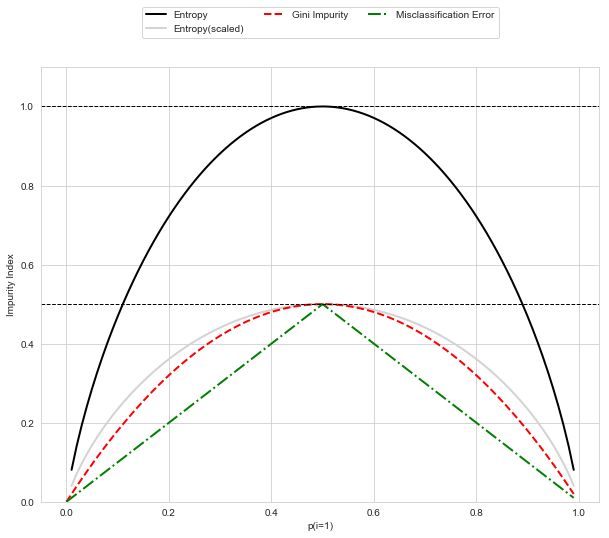

In [32]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111)
for i,lab,ls,c in zip([ent, sc_ent, gini(x), err], 
                      ['Entropy', 'Entropy(scaled)', 'Gini Impurity', 'Misclassification Error'],
                     ['-', '-', '--', '-.'],
                     ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x,i,label = lab, linestyle=ls, lw=2,color=c)
ax.legend(loc='upper center', bbox_to_anchor=(0.5,1.15), ncol=3,fancybox=True,shadow=False)
ax.axhline(y=0.5,linewidth=1, color='k',linestyle='--')
ax.axhline(y=1.0,linewidth=1, color='k',linestyle='--')
plt.ylim([0,1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

# Regression

In [33]:
from sklearn import tree

In [34]:
X = [[0,0], [3,3]]
y = [0.75, 3]

In [35]:
tree_reg = tree.DecisionTreeRegressor(random_state=42)

In [36]:
tree_reg = tree_reg.fit(X,y)

In [37]:
tree_reg.predict([[1.5,1.5]])

array([0.75])

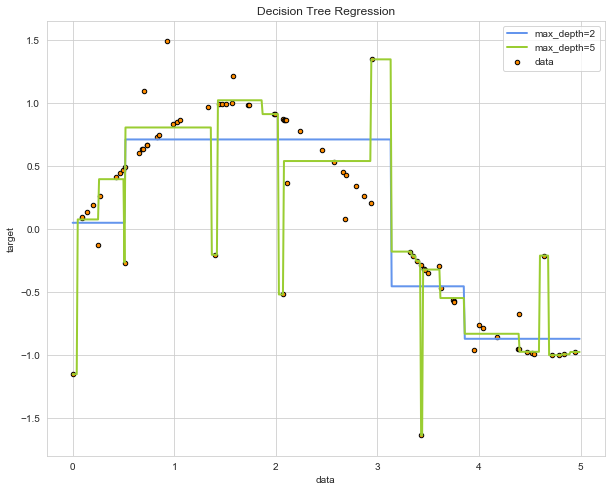

In [38]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure(figsize=(10,8))
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

## Regularization

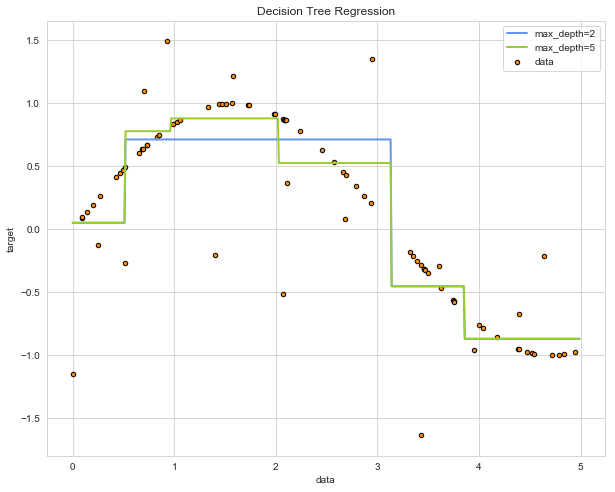

In [39]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5, min_samples_leaf=10)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure(figsize=(10,8))
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

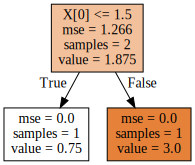

In [40]:
dot_data = tree.export_graphviz(tree_reg, out_file = None, filled = True)
graph = graphviz.Source(dot_data)
graph

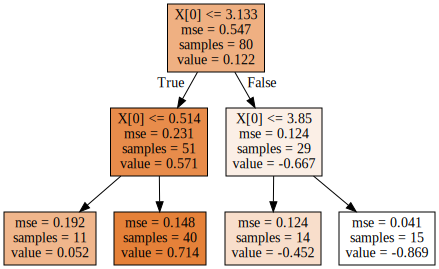

In [41]:
dot_data = tree.export_graphviz(regr_1, out_file = None, filled = True)
graph = graphviz.Source(dot_data)
graph

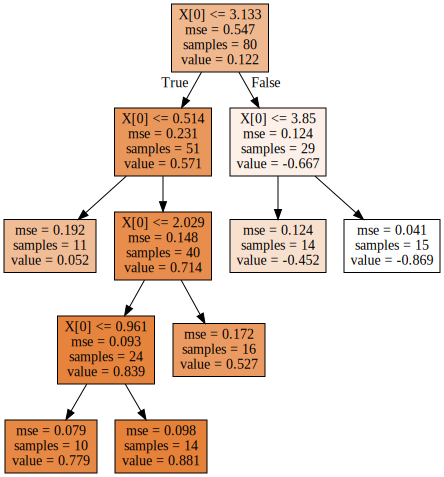

In [42]:
dot_data = tree.export_graphviz(regr_2, out_file = None, filled = True)
graph = graphviz.Source(dot_data)
graph

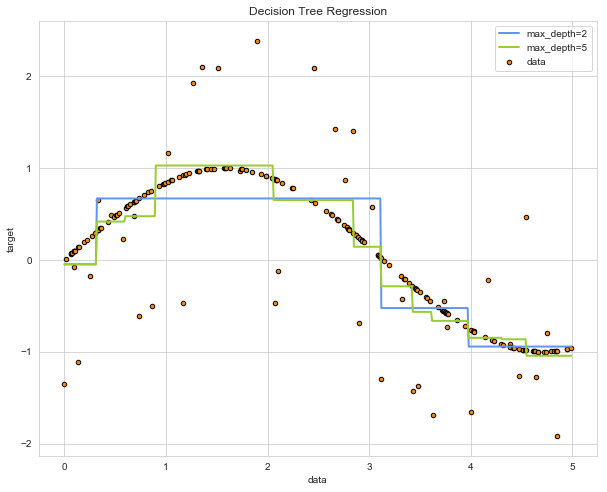

In [43]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(200, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(40))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5, min_samples_leaf=10)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure(figsize=(10,8))
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

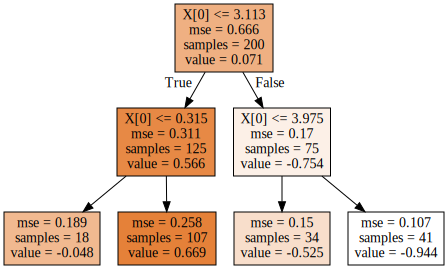

In [44]:
dot_data = tree.export_graphviz(regr_1, out_file = None, filled = True)
graph = graphviz.Source(dot_data)
graph

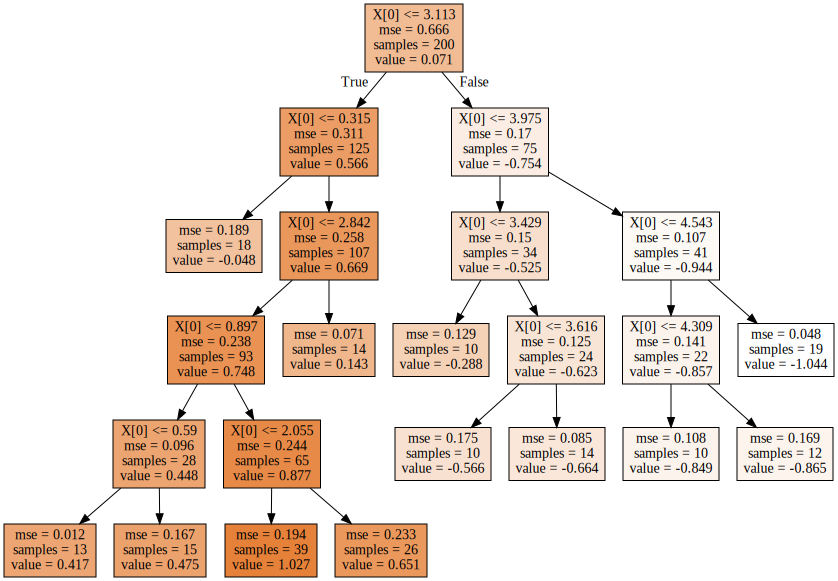

In [45]:
dot_data = tree.export_graphviz(regr_2, out_file = None, filled = True)
graph = graphviz.Source(dot_data)
graph

# Overfitting

In [46]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()

In [47]:
X = iris.data[:, 0:2]
y = iris.target
clf = tree.DecisionTreeClassifier(random_state=42)
clf = clf.fit(X,y)

In [48]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names = iris.feature_names[2:],
                               class_names = iris.target_names,
                               rounded = True,
                               filled = True)

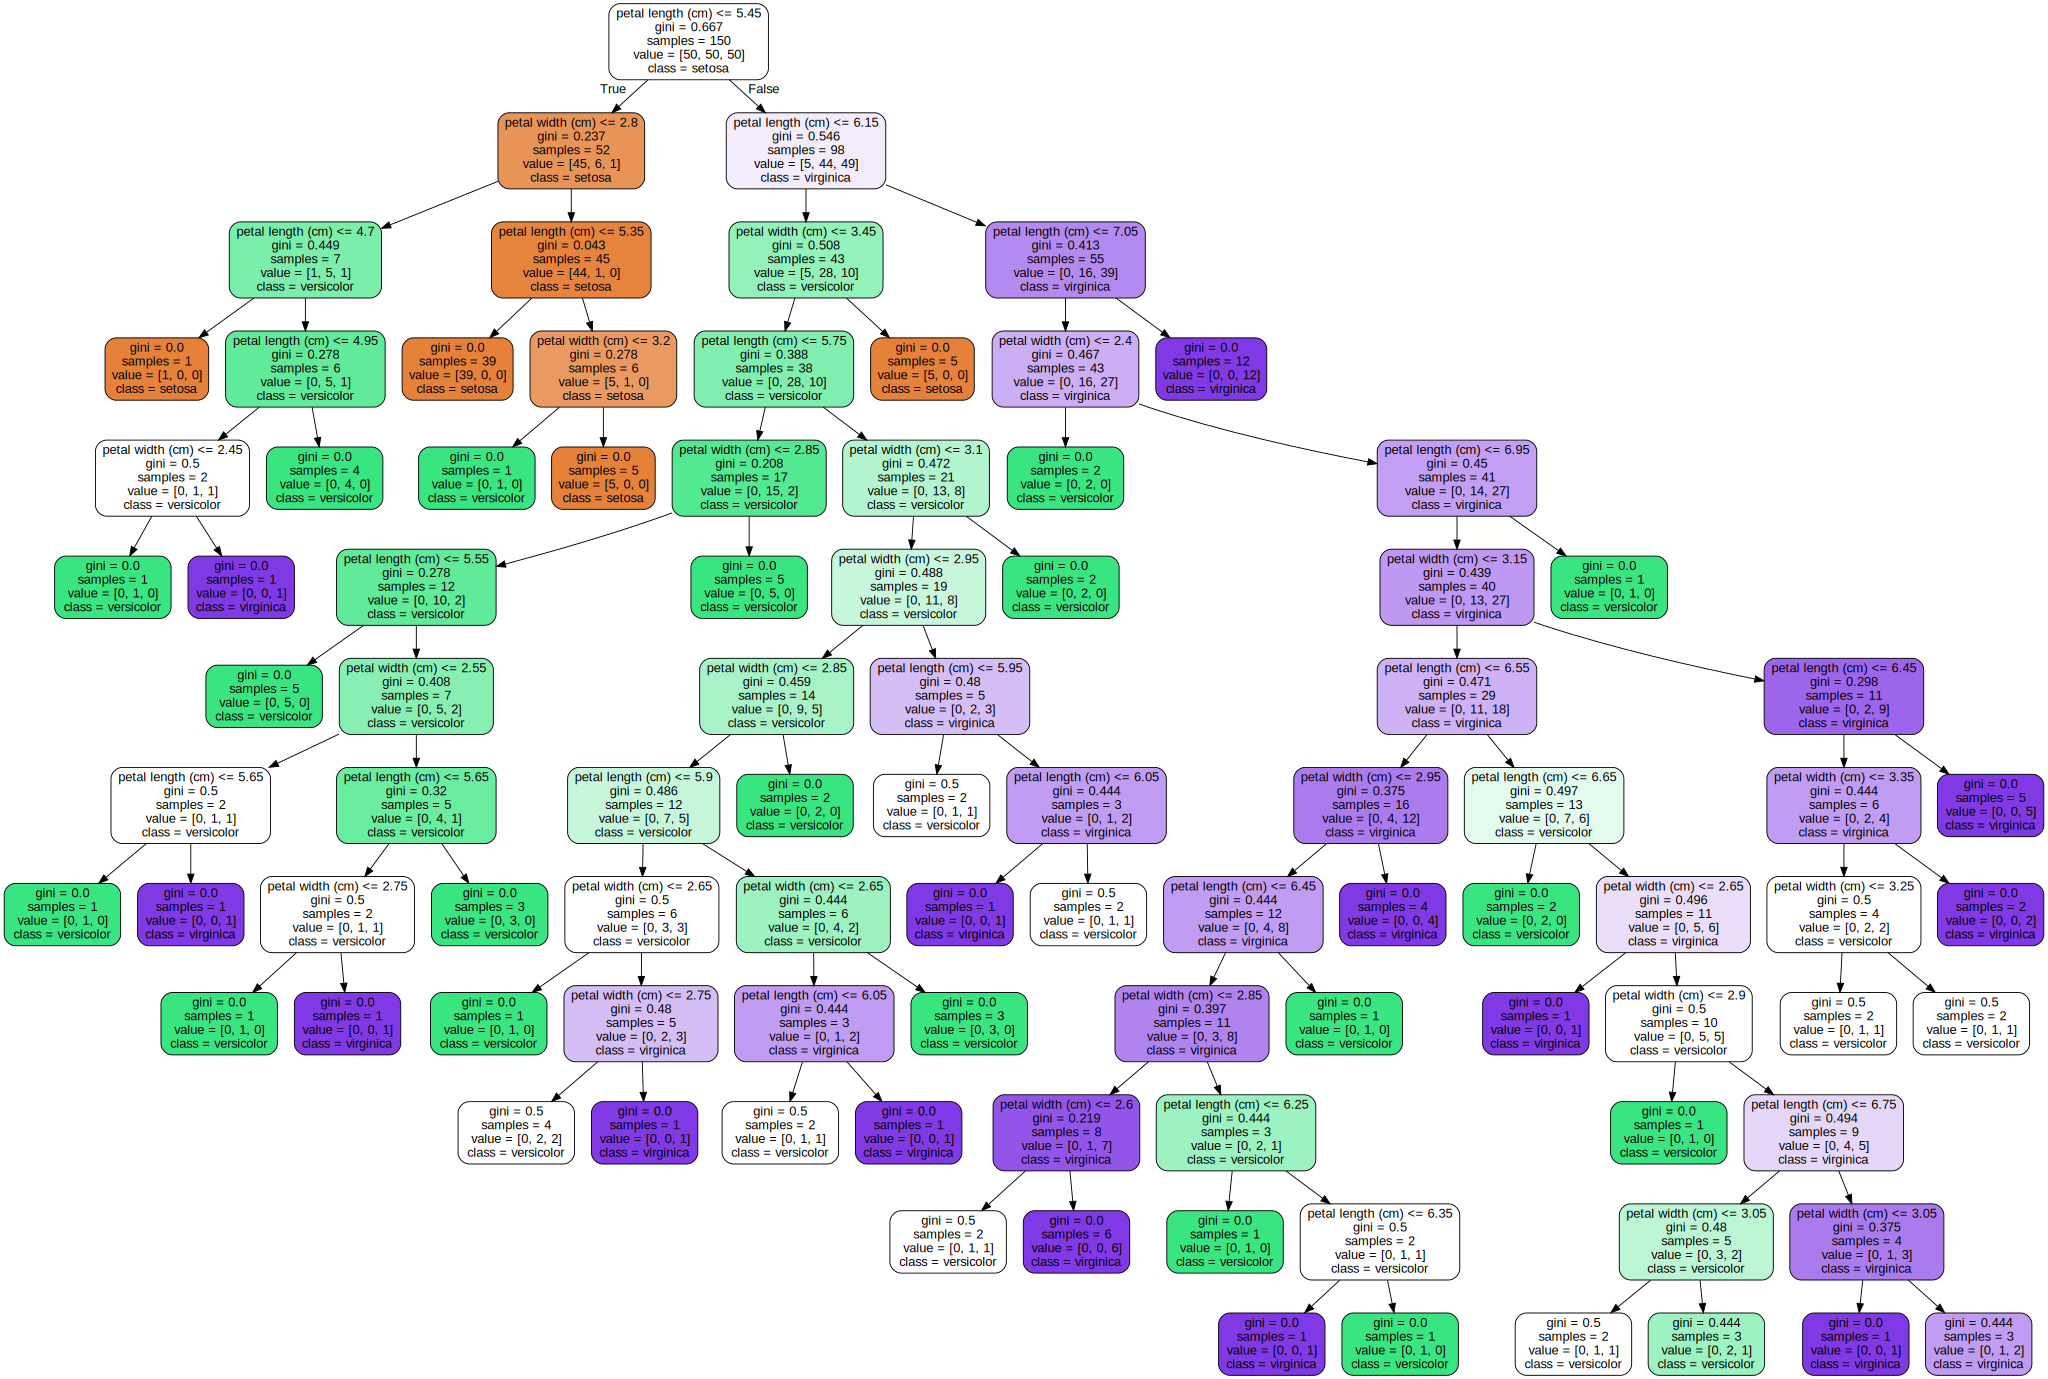

In [49]:
graph = graphviz.Source(dot_data)
graph

# Modelling End-To-End with Decision Tree

In [50]:
from sklearn.datasets import make_moons

In [51]:
X_data, y_data = make_moons(n_samples=1000, noise=0.5,random_state=42)

In [52]:
cl1 = tree.DecisionTreeClassifier(random_state=42)
cl2 = tree.DecisionTreeClassifier(min_samples_leaf=10,random_state=42)

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.1, random_state=42)

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
params = {'max_leaf_nodes' : list(range(2,50)),
         'min_samples_split' : [2,3,4]}

In [57]:
grid_search_cv = GridSearchCV(tree.DecisionTreeClassifier(random_state=42), params, n_jobs=-1, verbose=1)

grid_search_cv.fit(X_train, y_train)

C:\Users\Drake\Anaconda3\envs\Iris_2\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:    1.4s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 'min_samples_split': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [58]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=4, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

In [59]:
from sklearn.metrics import accuracy_score

In [60]:
y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test,y_pred)

0.82

In [61]:
cl1.fit(X_train, y_train)
y_pred = cl1.predict(X_test)
accuracy_score(y_test,y_pred)

0.74

In [62]:
cl2.fit(X_train, y_train)
y_pred = cl2.predict(X_test)
accuracy_score(y_test,y_pred)

0.84

In [63]:
cl1.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 42,
 'splitter': 'best'}

In [64]:
params = {'min_samples_leaf' : list(range(2,20))}

In [65]:
grid_search_cv = GridSearchCV(tree.DecisionTreeClassifier(random_state=42), params, n_jobs=-1, verbose=1)

grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


C:\Users\Drake\Anaconda3\envs\Iris_2\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    0.0s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [66]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=19, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [67]:
y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test,y_pred)

0.83